# Logistic Regression

## Lab | Making predictions with logistic regression


## Instructions

1.Create a logistic regression model to predict the variable "satisfaction" from the cleaned data.

2.Evaluate the results.

In [3]:
import imblearn
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

import seaborn as sns

In [4]:
air_df = pd.read_csv('/Users/leozinho.air/Desktop/ironhack_da/class_09/lab-predictions-logistic-regression/Invistico_Airline.csv')
air_df

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0


In [5]:
# Handling Nan values

air_df.groupby('satisfaction').count() # There are some nans

air_df.isnull().sum() # 393 in Arrival Delay in Minutes columns

# Since they are 3% of our dataset, i drop them

air_df = air_df.dropna()

air_df.isnull().sum() # 0 Nans

# Standardize columns

columns = []

for i in range(len(air_df.columns)):
    columns.append(air_df.columns[i].lower().replace(' ', '_'))

air_df.columns = columns

# Convert "satisfaction" to binary

air_df['satisfaction'] = np.where(air_df['satisfaction'] == 'satisfied', 1,0).astype(float)


air_df




,satisfaction,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,...,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,1.0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1.0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1.0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1.0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1.0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1.0,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129876,0.0,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129877,0.0,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,0.0,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0


In [6]:
# Split df to num_df and cat_df

num_df = air_df.select_dtypes(include = np.number)

cat_df = air_df.select_dtypes(include = object )

num_df = num_df.reset_index (drop = True)
cat_df = cat_df.reset_index (drop = True)

# Display unique values to better understanding

for column in cat_df.columns:
    print(f"Unique values in column '{column}': {cat_df[column].unique()}")

print('\n')
print('Since there are few unique values i will encode the categorical with OHE')

# Encoding categoricals

dummies_df = pd.get_dummies(cat_df, drop_first= False)

dummies_df = dummies_df.reset_index(drop = True)

dummies_df

Unique values in column 'customer_type': ['Loyal Customer' 'disloyal Customer']
Unique values in column 'type_of_travel': ['Personal Travel' 'Business travel']
Unique values in column 'class': ['Eco' 'Business' 'Eco Plus']


Since there are few unique values i will encode the categorical with OHE


,customer_type_Loyal Customer,customer_type_disloyal Customer,type_of_travel_Business travel,type_of_travel_Personal Travel,class_Business,class_Eco,class_Eco Plus
0,1,0,0,1,0,1,0
1,1,0,0,1,1,0,0
2,1,0,0,1,0,1,0
3,1,0,0,1,0,1,0
4,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...
129482,0,1,0,1,0,1,0
129483,0,1,0,1,1,0,0
129484,0,1,0,1,0,1,0
129485,0,1,0,1,0,1,0


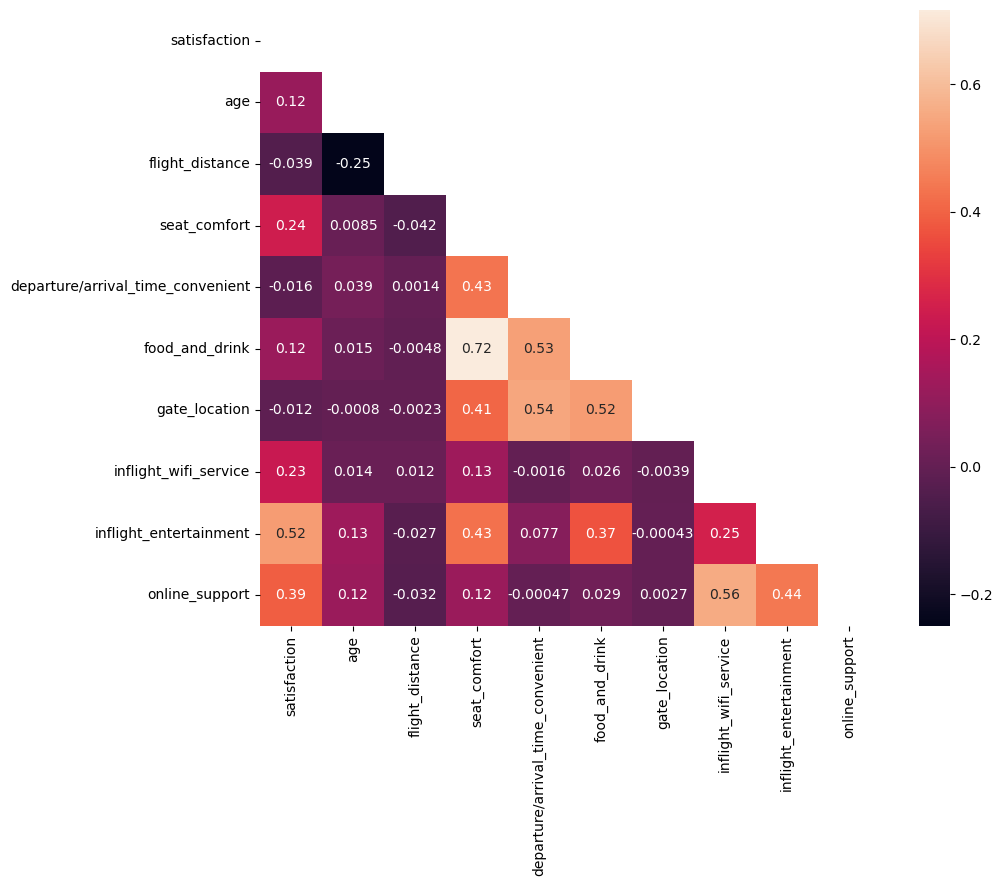

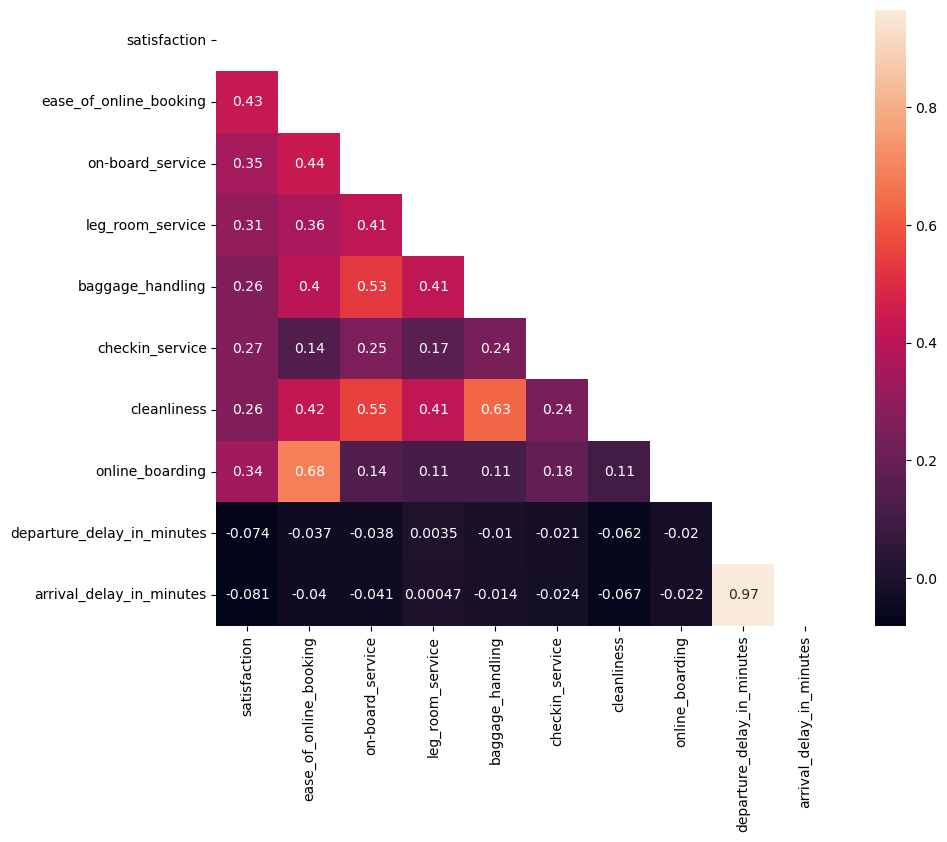

In [7]:
# First correlations matrix
cols = ['satisfaction', 'age', 'flight_distance', 'seat_comfort',
       'departure/arrival_time_convenient', 'food_and_drink', 'gate_location',
       'inflight_wifi_service', 'inflight_entertainment', 'online_support'] 
correlations_matrix = num_df[cols].corr()
correlations_matrix

# Visualizing the correlation matrix

mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

# Second correlations matrix
cols = ['satisfaction','ease_of_online_booking', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'cleanliness', 'online_boarding',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes']
correlations_matrix = num_df[cols].corr()
correlations_matrix

# Visualizing the correlation matrix

mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

# The Matrix do not show any multicollinearity issues


In [8]:
# Concatenate the two dfs

air_df_encoded = pd.concat([num_df, dummies_df], axis = 1)

# Modeling

from sklearn.linear_model import LogisticRegression

# Define our dependent and independent variables
X = air_df_encoded.drop('satisfaction', axis = 1)
y = air_df_encoded['satisfaction']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

LR = LogisticRegression() # This is an empty model! We have to fit it

LR.fit(X_train,y_train) # Fitting the model with our data. Since we're updating LR, there is no need to create a new variable

LR.score(X_test, y_test)


print('This model has an accuracy of: ', round(LR.score(X_test, y_test),4))




This model has an accuracy of:  0.7596


In [9]:
# While accuracy is not absolutely terrible, lets check how other evual metrics

from sklearn.metrics import precision_score # This is the precision
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score # f1
from sklearn.metrics import classification_report # This is the classification matrix

# Here we want to maximize recall

pred = LR.predict(X_test) # He is predicting Y
pred

print("Precision is: ", round(precision_score(y_test, pred),3))
print("Recall is: ",round(recall_score(y_test, pred),3))
print("F1 is: ",round(f1_score(y_test, pred),3))
print('\n')
print(classification_report(y_test, pred))


Precision is:  0.772
Recall is:  0.791
F1 is:  0.782


              precision    recall  f1-score   support

         0.0       0.74      0.72      0.73     11821
         1.0       0.77      0.79      0.78     14077

    accuracy                           0.76     25898
   macro avg       0.76      0.76      0.76     25898
weighted avg       0.76      0.76      0.76     25898



In [10]:
# We fail to indentify 30&+ of people satisfied

# Lets ses and interpret what a confusion matrix is
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

# In here 2942 people are not satisfied but our model did not show it


array([[ 8538,  3283],
       [ 2942, 11135]])